# Final Excercise

In this notebook, you will find the last exercise of the lecture:
You are handed an initial dataset with several features and a univariate target. Next, you have to decide how to proceed. Since you do not have enough data to yet construct a classifier/predictor of any sensible evaluation metrics, the first task is, therefore, to acquire more data. For this purpose you can obtain batches of data according to your own design of experiments, so you will need to decide which experiments you consider necessary to perform. 

You will have four opportunities to acquire more data. Each time you have to decide which experiments to run and send those to Franz Götz-Hahn as a CSV file. The deadlines are 16.06.2023, 23.06.2023, 30.06.2023, and 07.07.2023 and 12:00 (noon). The format in all cases is a table with one row for each choosable feature, and the column entries corresponding to the desired values. Each individual sample will take approximately 30min, so pick a reasonable amount of experiments. For example, you will get the result for 100 experiments roughly 50 hours after the respective deadline. Should the experiment not be conductible, you will get a ``None`` as a result, e.g., if a feature value is out of range.

Once you have your data, you should compare the performance of different classifiers in predicting the targets. The classifiers to compare are [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). You should utilize all the different parts of the E2ML lecture that you considern appropriate. This could include Data Preprocessing, Design of Experiments for the batches, deciding on Performance Measures, Statistical Significance Testing of a hypothesis, Design of Experiments for Hyperparameter Optimization.

Should you wish to present the results from this excercise in the oral examination, you need to hand in your entire package until 14.07.2023-23:59 as a GitHub Repository. Send the link to the (public) repository to Franz Götz-Hahn via [E-Mail](mailto:franz.goetz-hahn@uni-kassel.de). Please use the README of the repository to describe the structure of the package, include any required packages in the setup.py, add the data in the data subfolder, save any results in the results subfolder, and include a _descriptive_ jupyter notebook in the notebooks subfolder.

Do note, that the point of this excercise is **not** to achieve the best performance of your models, but rather to document your process and give the motivation behind your chosen approaches, _even the ones that failed_.

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from e2ml.preprocessing import StandardScaler

### **Mollusc Classification** <a class="anchor" id="heart"></a>

Your dataset describes some physical measurements of a specific type of molluscs. Your goal is to predict the `Stage of Life` of the mollusc. The data you can get looks as follows:


| Sex	|Length	|Width	|Height|	Weight	|Non_Shell Weight	|Intestine Weight	|Shell Weight	|Stage of Life |
| ---                           | ----   | ----    | ----    | ----   |----             |----    |---- | ---------- |
| {Male (M), Female (F), Indeterminate (I)} | float (inches)     | float (inches)     |  float (inches)     | float (gram)      | float (gram)              | float (gram)     |  float (gram)     | {Child, Adolescent (Adole), Adult}      |

The table headings are identical to the column names in the corresponding CSV-files. 

We can send out divers that look for molluscs that fit your needs, which will subsequently be analyzed in a laboratory. You can request molluscs with all features except the Stage of Life attribute, as it is the target. The first day of diving has already been completed. After 8 hours of diving, they brought up the following molluscs:

In [133]:
initial_molluscs_data = pd.read_csv('../data/initial_molluscs_data.csv')
initial_molluscs_data

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450,0.345,0.120,0.4165,0.1655,0.0950,0.1350,Adult
1,F,0.475,0.380,0.145,0.5700,0.1670,0.1180,0.1870,Adole
2,M,0.610,0.485,0.170,1.0225,0.4190,0.2405,0.3600,Adult
3,I,0.430,0.340,0.105,0.4405,0.2385,0.0745,0.1075,Adole
4,M,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,Adult
5,M,0.600,0.475,0.175,1.3445,0.5490,0.2875,0.3600,Child
6,I,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,Adult
7,F,0.625,0.495,0.160,1.1115,0.4495,0.2825,0.3450,Child
8,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.4320,Adult
9,F,0.620,0.480,0.165,1.0430,0.4835,0.2210,0.3100,Adult


# 1. Acquisition

In [134]:
# Convert nominal feature to numerical
lbl_encoder = LabelEncoder()
initial_molluscs_data['Sex'] = lbl_encoder.fit_transform(initial_molluscs_data['Sex'])

# Seperate X and y
X = initial_molluscs_data.iloc[:, :8]
y = initial_molluscs_data.iloc[:, 8]

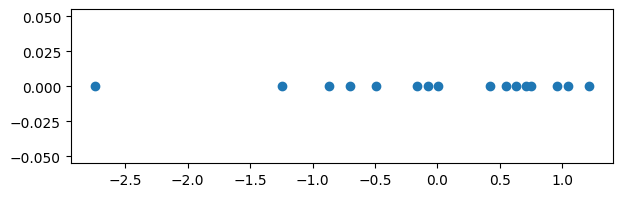

In [135]:
# Standardize dataset
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

# Plot scaled data
x = X_std[:, 1]
plt.figure(figsize=(7,2))
plt.scatter(x=x, y=np.zeros_like(x))
plt.show()

In [136]:
from e2ml.experimentation import lat_hyp_cube

n_samples = 310
bounds = [[-2, 2] for _ in range(8)]

# Generate 100 samples with latin hypercube
X_latin = lat_hyp_cube(n_samples=n_samples, n_dimensions=8, bounds=bounds)

# Use random discrete values for nominal feature
X_latin[:, 0] = np.random.choice(np.unique(X_std[:, 0]), size=n_samples)

In [137]:
# Reconstruct design matrix
X_rec = scaler.inverse_transform(X_latin)

design_df = pd.DataFrame(data=X_rec, columns=X.columns)
design_df['Sex'] = design_df['Sex'].astype(int)

# Decode nominal features
design_df['Sex'] = lbl_encoder.inverse_transform(design_df['Sex'])


In [138]:
# Remove rows with values < 0
numerical_cols = ['Length', 'Width', 'Height', 'Weight', 'Non_Shell Weight', 'Intestine Weight', 'Shell Weight']
count = 0
for col in numerical_cols:
    design_df = design_df[design_df[col] >= 0]

design_df.shape

(257, 8)

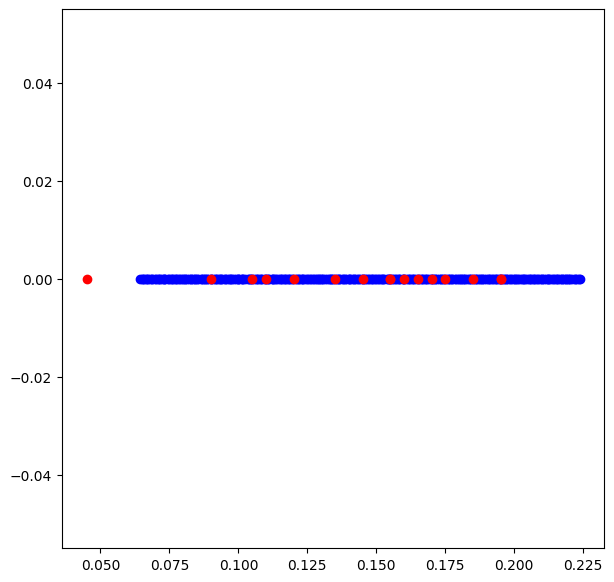

In [139]:
# Plot new generated samples
x = X.iloc[:, 3]
x_gen = X_rec[:, 3]
y  = X_rec[:, 2]

plt.figure(figsize=(7,7))
plt.scatter(x_gen, np.zeros_like(x_gen), c='blue')
plt.scatter(x, np.zeros_like(x), c='red')

In [140]:
# Drop 7 samples to obtain 250 samples
result = design_df.iloc[:250, :]

# Save to csv file
# result.to_csv('../data/DoE_Albayrak_01.csv', index=False)

# 2. Aquisition

In [141]:
# Load new batch and concat with initial data
batch_1 = pd.read_csv('../data/batch1_albayrak_labels.csv')
initial_molluscs_data = pd.read_csv('../data/initial_molluscs_data.csv')
molluscs_df = pd.concat([initial_molluscs_data, batch_1])

molluscs_df

,Sex,Length,Width,Height,Weight,Non_Shell Weight,Intestine Weight,Shell Weight,Stage of Life
0,F,0.450000,0.345000,0.120000,0.416500,0.165500,0.095000,0.135000,Adult
1,F,0.475000,0.380000,0.145000,0.570000,0.167000,0.118000,0.187000,Adole
2,M,0.610000,0.485000,0.170000,1.022500,0.419000,0.240500,0.360000,Adult
3,I,0.430000,0.340000,0.105000,0.440500,0.238500,0.074500,0.107500,Adole
4,M,0.205000,0.155000,0.045000,0.042500,0.017000,0.005500,0.015500,Adult
...,...,...,...,...,...,...,...,...,...
245,M,0.710450,0.564696,0.128028,0.837041,0.626681,0.162846,0.453690,Adole
246,I,0.328120,0.264151,0.192703,0.290816,0.437779,0.140575,0.011481,Child
247,I,0.537831,0.501820,0.208908,1.011825,0.551533,0.396866,0.380240,Child
248,M,0.633878,0.263183,0.171297,0.737849,0.207348,0.189870,0.182853,Adult


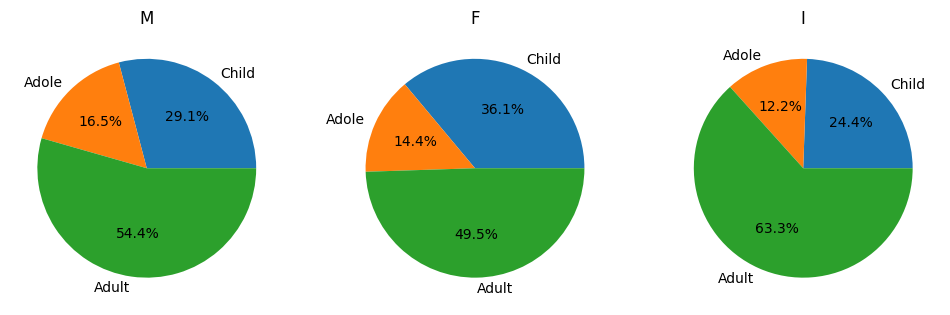

In [142]:
# Explore new data
life_stages = ['Child', 'Adole', 'Adult']
sexes = ['M', 'F', 'I']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for idx, s in enumerate(sexes):
    ratios = []
    for stage in life_stages:
        stage_ratio = len(molluscs_df[(molluscs_df['Stage of Life'] == stage) & (molluscs_df['Sex'] == s)])
        ratios.append(stage_ratio)

    # generate subplot for each sex
    axs[idx].pie(ratios, labels=life_stages, autopct='%1.1f%%')
    axs[idx].set_title(s)

fig.savefig('../results/plots/stage_of_life_batch1.jpg')

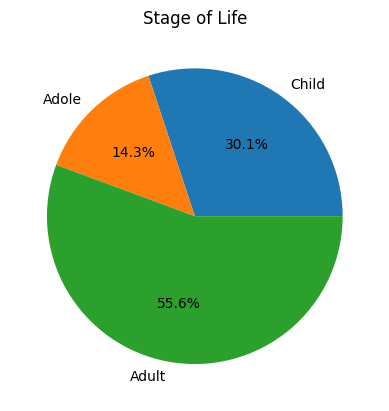

In [143]:
ratios = []
for stage in life_stages:
    ratio = len(molluscs_df[molluscs_df['Stage of Life']==stage])
    ratios.append(ratio)

plt.pie(ratios, labels=life_stages, autopct='%1.1f%%')
plt.title('Stage of Life')
plt.show()

mean and variance for Child: (0.5319738980712192, 0.14152284870888243)
mean and variance for Adole: (0.8779223694936547, 0.17472621563619367)
mean and variance for Adult: (1.144206210956719, 0.24167296604959715)


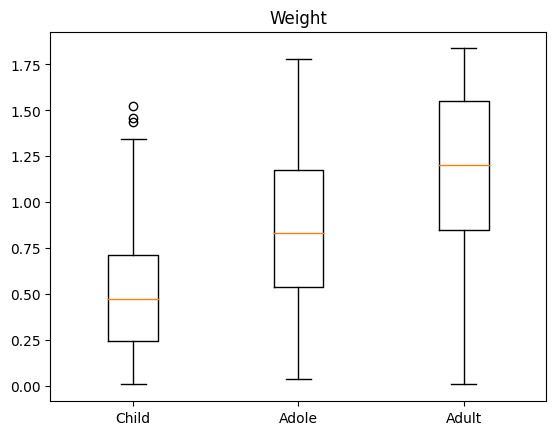

In [144]:
# Plot mean values for each sex
seq = []
feature = 'Weight'

mean_var_dict = {}

for s in life_stages:
    loc_df = molluscs_df[molluscs_df['Stage of Life'] == s]
    x = loc_df[feature]
    mean_var_dict[s] = (np.mean(x), np.var(x))
    print(f'mean and variance for {s}: {mean_var_dict[s]}')
    seq.append(x)

plt.boxplot(seq, labels=life_stages)
plt.title(feature)
plt.show()

In [145]:
# Compute optimal ratio of samples
n_samples = 266 + 250
optimal_ratio = n_samples/3
print(f'optimal ratio per class: {optimal_ratio}')

print('-----------------------')

for s in life_stages:
    loc_df = molluscs_df[molluscs_df['Stage of Life'] == s]
    print(f'current ratio {s}: {len(loc_df)}')
    print(f'needed samples: {optimal_ratio - len(loc_df)}')
    print('-----------------------')

optimal ratio per class: 172.0
-----------------------
current ratio Child: 80
needed samples: 92.0
-----------------------
current ratio Adole: 38
needed samples: 134.0
-----------------------
current ratio Adult: 148
needed samples: 24.0
-----------------------


In [146]:
# Convert nominal feature to numerical
lbl_encoder = LabelEncoder()
molluscs_df['Sex'] = lbl_encoder.fit_transform(molluscs_df['Sex'])

# Seperate X and y
X = molluscs_df.iloc[:, :8]
y = molluscs_df.iloc[:, 8]

In [147]:
# Standardize each class seperately
scaler_child = StandardScaler()
scaler_adole = StandardScaler()
scaler_adult = StandardScaler()

child_df = X[y == 'Child']
scaler_child.fit(child_df)
child_df_std = scaler_child.transform(child_df)

adole_df = X[y == 'Adole']
scaler_adole.fit(adole_df)
adole_df_std = scaler_adole.transform(adole_df)

adult_df = X[y == 'Adult']
scaler_adult.fit(adult_df)
adult_df_std = scaler_adult.transform(adult_df)

In [149]:
from e2ml.experimentation import halton

n_samples_child = 100
bounds = [[-2, 2] for _ in range(8)]

# Generate 100 samples with latin hypercube
X_latin_child = halton(n_samples=n_samples, n_dimensions=8, bounds=bounds)

# Use random discrete values for nominal feature
X_latin_child[:, 0] = np.random.choice(np.unique(X_std[:, 0]), size=n_samples)

In [150]:
X_latin_child

array([[ 1.34687429, -0.66666667, -1.2       , ..., -1.69230769,
        -1.76470588, -1.78947368],
       [-0.92154557,  0.66666667, -0.4       , ..., -1.38461538,
        -1.52941176, -1.57894737],
       [ 0.21266436, -1.55555556,  0.4       , ..., -1.07692308,
        -1.29411765, -1.36842105],
       ...,
       [ 1.34687429, -0.60631001,  1.5456    , ...,  0.15930815,
        -0.87807857, -1.70024785],
       [-0.92154557,  0.72702332, -1.4944    , ...,  0.46700046,
        -0.64278445, -1.48972153],
       [ 0.21266436, -1.4951989 , -0.6944    , ...,  0.77469276,
        -0.40749033, -1.27919522]])